In [1]:
from heat_equation_steady_state.trainer import *
from heat_equation_steady_state.data_sampling import *
from heat_equation_steady_state.visualize import *
from heat_equation_steady_state.utility_functions import *
import heat_equation_steady_state_network as network

# Deep Galerkin Method with Heat Equation in 1D

In [2]:
lx_1d = 2.0
bounds_1d = [[0.0, lx_1d]]
alpha = 1

# Data Sizes
N_INT = 1500
N_BC =800

## Data Preparation

In [3]:
# 1. Domain Data (x in [0, lx_1d])
x_int = generate_domain_points(N_INT, bounds_1d)
#print("Internal domain points ",x_int)
f_x = source_term_fn_1D(x_int, alpha).to(device)
domain_data = (x_int, f_x)

# 2 Boundary Points
c_bc = generate_bc_points(N_BC, bounds_1d)
u_bc = boundary_condition_fn_1D(c_bc).to(device)
bc_data = (c_bc, u_bc)

## Visualizing the Generated Domain and Boundary points

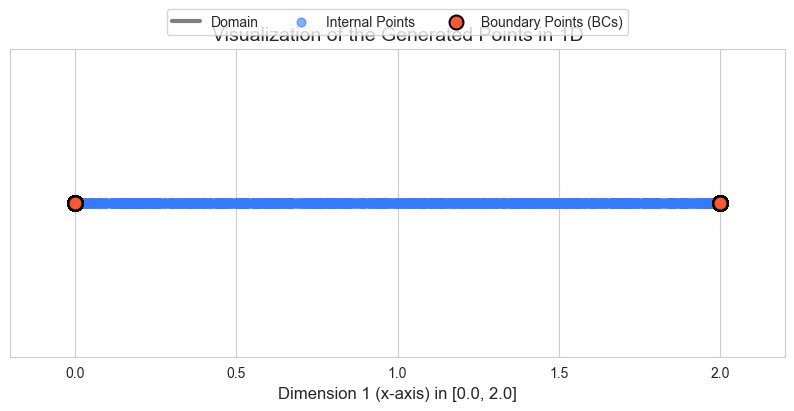

In [4]:
visualize_points_1d(x_int,c_bc, bounds_1d)

## Network Initialization

In [5]:
num_layers = 5
nodes_per_layer = 64
learning_rate = 0.001
epochs = 1000

model = network.DGMNet(nodes_per_layer, num_layers, 1).to(device)

trainer = DGMTrainerSS(
    model=model,
    learning_rate=learning_rate
)

## Training

In [6]:
trainer.train(
    epochs=epochs,
    domain_data=domain_data,
    bc_data=bc_data,
    lambda_pde=5000.0,
    lambda_bc=5000.0,
)

Starting training on mps. Interior: 1500, BC: 800 points.
Epoch 100/1000 | Total Loss: 506.8978 | L_pde: 0.0398 | L_bc: 0.0616
Epoch 200/1000 | Total Loss: 9.2905 | L_pde: 0.0019 | L_bc: 0.0000
Epoch 300/1000 | Total Loss: 1.2846 | L_pde: 0.0003 | L_bc: 0.0000
Epoch 400/1000 | Total Loss: 0.8601 | L_pde: 0.0002 | L_bc: 0.0000
Epoch 500/1000 | Total Loss: 0.6867 | L_pde: 0.0001 | L_bc: 0.0000
Epoch 600/1000 | Total Loss: 1.2518 | L_pde: 0.0002 | L_bc: 0.0000
Epoch 700/1000 | Total Loss: 0.5406 | L_pde: 0.0001 | L_bc: 0.0000
Epoch 800/1000 | Total Loss: 0.4241 | L_pde: 0.0001 | L_bc: 0.0000
Epoch 900/1000 | Total Loss: 1.5868 | L_pde: 0.0003 | L_bc: 0.0000
Epoch 1000/1000 | Total Loss: 0.4225 | L_pde: 0.0001 | L_bc: 0.0000


## Visualizing the Solution [u(x)]

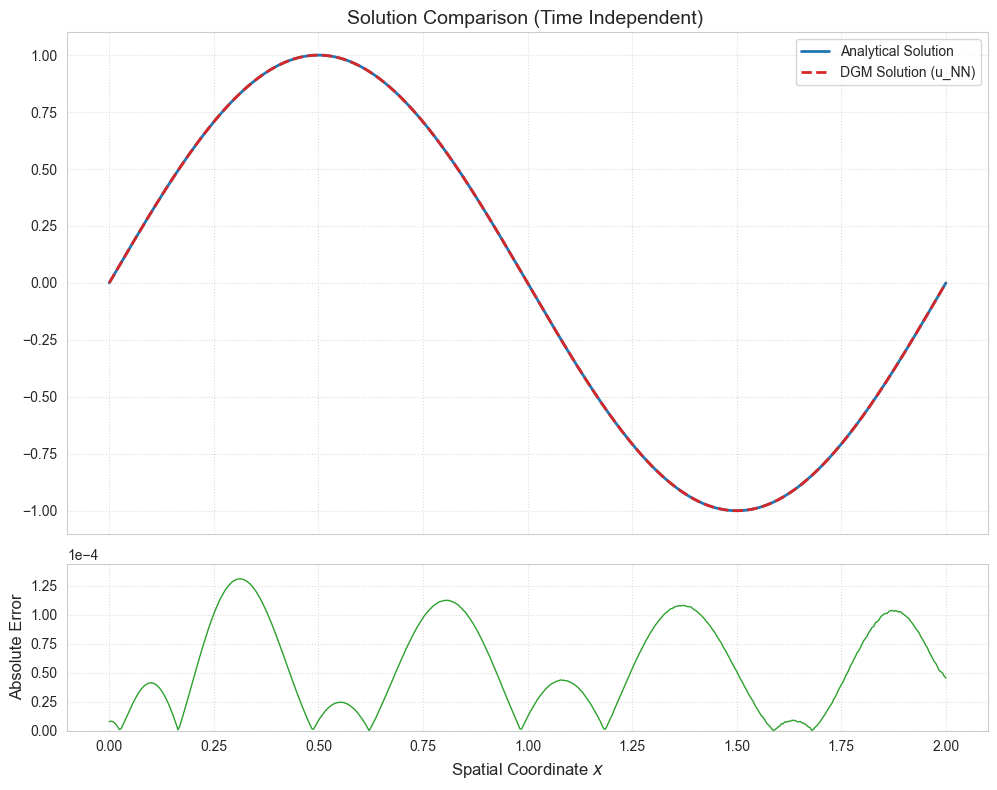

In [7]:
visualize_solution_1d(model, lx_1d,n_test_points=500)

# Deep Galerkin Method with Heat Equation in 2D

In [8]:
lx_2d = 2.0
ly_2d = 2.0
T_max = 2.0
bounds_2d = [[0.0, lx_2d],[0.0, ly_2d]]

# PDE Constants (for Heat Equation: u_t = alpha * u_xx + f)
ALPHA = 1

# Data Sizes
N_INT = 2000
N_BC =800

## Data Preparation

In [9]:
# 1. Interior Data (t in [0, T_max], x in [0, lx_1d])
spatial_coords = generate_domain_points(N_INT, bounds_2d)
x_int = spatial_coords[:, 0:1]
y_int = spatial_coords[:, 1:2]
f_xy = source_term_fn_2D(x_int, y_int,ALPHA).to(device)
interior_data = (x_int, y_int,  f_xy)


# 2. Boundary Condition Data (t in [0, T_max], x = 0 or 1)
spatial_coords_bc = generate_bc_points(N_BC, bounds_2d)
x_bc = spatial_coords_bc[:, 0:1]
y_bc = spatial_coords_bc[:, 1:2]
u_bc = boundary_condition_fn_2D(x_bc, y_bc).to(device)
bc_data = (x_bc,y_bc, u_bc)

## Visualizing the Generated Domain and Boundary Points

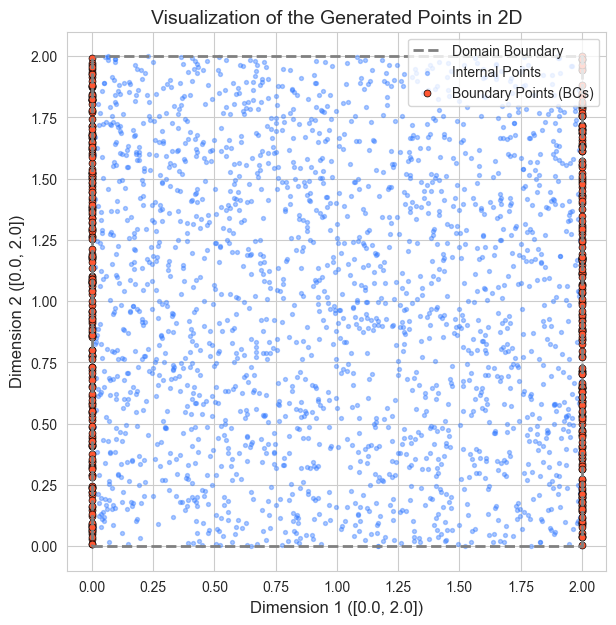

In [10]:
visualize_points_2d(spatial_coords, spatial_coords_bc, bounds_2d)

## Network Initialization

In [15]:
num_layers = 6
nodes_per_layer = 64
learning_rate = 0.001
epochs = 4000

model = network.DGMNet(nodes_per_layer, num_layers, 2).to(device)

trainer = DGMTrainerSS_2D(
    model=model,
    learning_rate=learning_rate
)

## Training

In [16]:
trainer.train(
    epochs=epochs,
    domain_data=interior_data,
    bc_data=bc_data,
    lambda_pde=5.0,
    lambda_bc=5.0
)

Epoch 100/4000 | Total Loss: 3.4384 | L_pde: 0.6244 | L_bc: 0.0633
Epoch 200/4000 | Total Loss: 0.9539 | L_pde: 0.1555 | L_bc: 0.0353
Epoch 300/4000 | Total Loss: 0.3347 | L_pde: 0.0526 | L_bc: 0.0144
Epoch 400/4000 | Total Loss: 0.1929 | L_pde: 0.0328 | L_bc: 0.0058
Epoch 500/4000 | Total Loss: 0.1047 | L_pde: 0.0183 | L_bc: 0.0026
Epoch 600/4000 | Total Loss: 2.3258 | L_pde: 0.4625 | L_bc: 0.0026
Epoch 700/4000 | Total Loss: 0.0267 | L_pde: 0.0044 | L_bc: 0.0010
Epoch 800/4000 | Total Loss: 0.0387 | L_pde: 0.0069 | L_bc: 0.0008
Epoch 900/4000 | Total Loss: 0.2726 | L_pde: 0.0538 | L_bc: 0.0008
Epoch 1000/4000 | Total Loss: 0.0138 | L_pde: 0.0022 | L_bc: 0.0006
Epoch 1100/4000 | Total Loss: 0.0138 | L_pde: 0.0023 | L_bc: 0.0005
Epoch 1200/4000 | Total Loss: 0.3909 | L_pde: 0.0776 | L_bc: 0.0006
Epoch 1300/4000 | Total Loss: 0.0150 | L_pde: 0.0026 | L_bc: 0.0004
Epoch 1400/4000 | Total Loss: 0.1049 | L_pde: 0.0205 | L_bc: 0.0005
Epoch 1500/4000 | Total Loss: 0.3052 | L_pde: 0.0604 | L_

## Visualizing the Solution [ u(x,y) ]

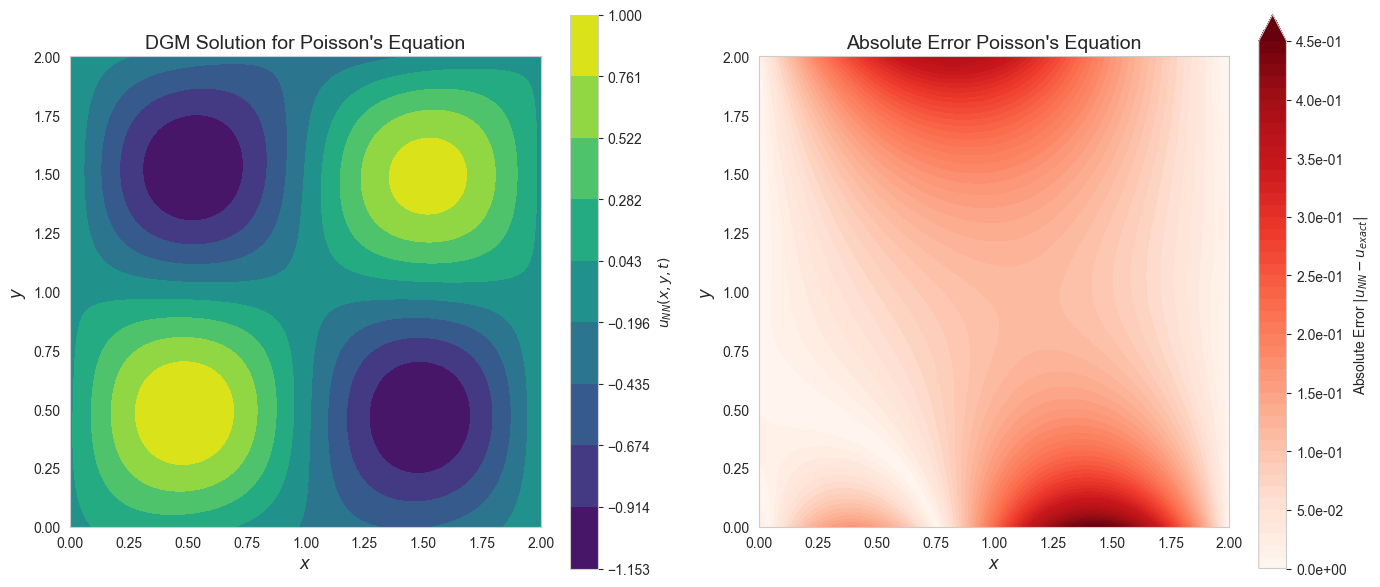

In [17]:
visualize_2d(
    model=model,
    bounds=bounds_2d,
    n_grid=500
)

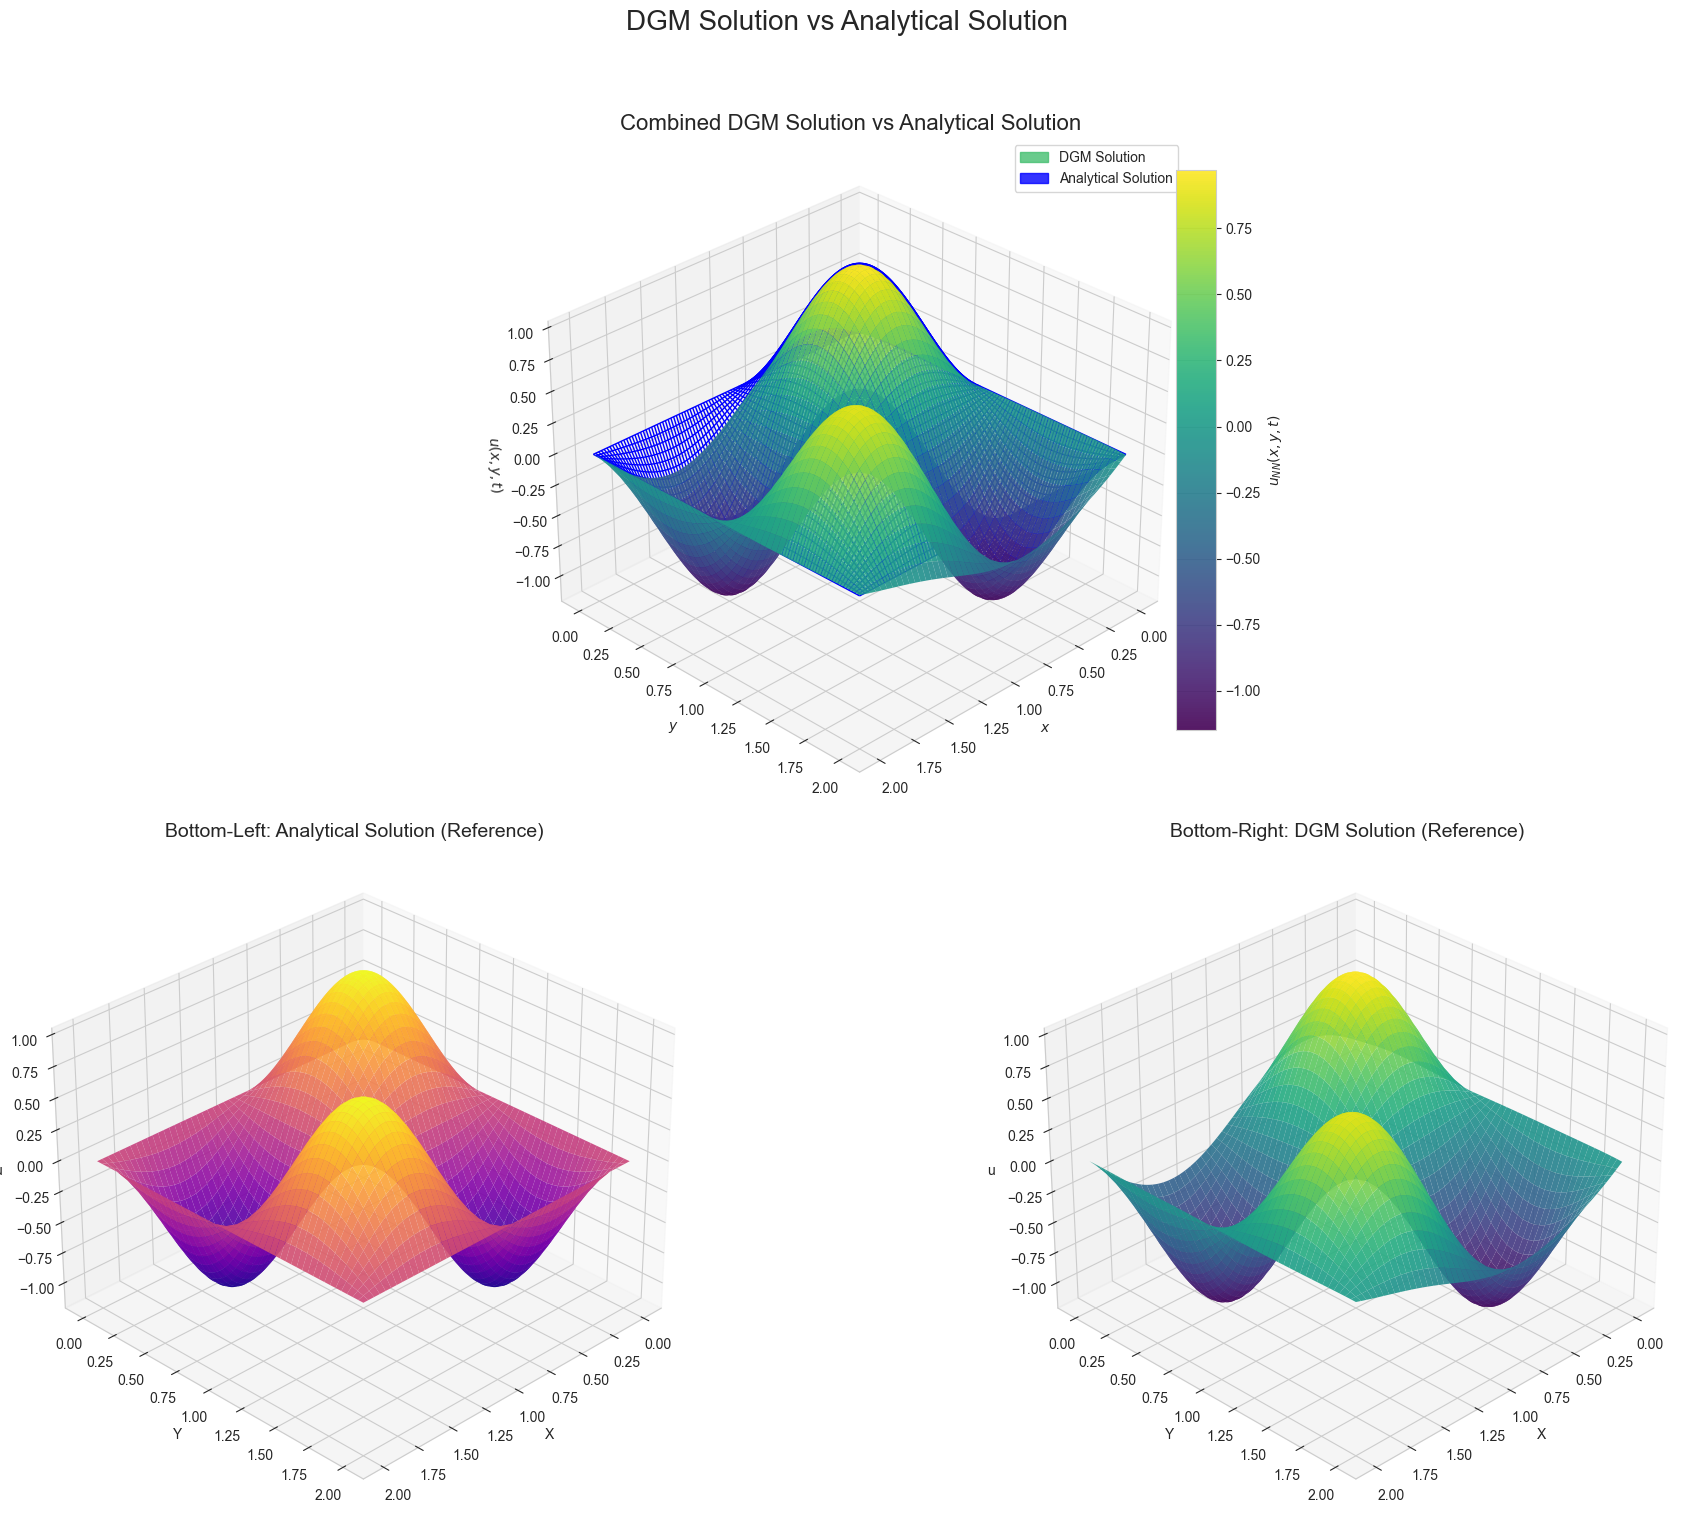

In [18]:
visualize_solution_2d(
    model=model,
    bounds=bounds_2d,
    n_grid=500
)